##### Figure 11
# CONUS 95th percentile wind occurrence

In [2]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
from mpl_toolkits.basemap import Basemap

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import *
from BB_wx_calcs.wind import wind_uv_to_spd
from BB_basemap.draw_maps import draw_CONUS_HRRR_map
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict
from BB_MesoWest.MesoWest_timeseries import get_mesowest_ts
from BB_MesoWest.MesoWest_nearesttime import get_mesowest_nearesttime
from BB_MesoWest.MesoWest_percentiles import get_mesowest_percentiles
from BB_data.grid_manager import pluck_point_new
from BB_wx_calcs.wind import wind_uv_to_spd

In [3]:
from matplotlib.dates import DateFormatter
formatter = DateFormatter('%b')

import matplotlib as mpl 
two_column = 5.5
one_column = 3.2
twothird_column = 6.8
mpl.rcParams['figure.figsize'] = [6.9, 9.3]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.00
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
    
mpl.rcParams['savefig.dpi'] = 600    # 600 for print

AMS Journal Figure size chart.  
_Note: Figsize parameter may differ from what is actually generated_

| One Colulmn | 2/3 Page   | Two Columns   | More than 2 columns  |
|---|---|---|---|
| 3.2   | 4.5  | 5.5  | 6.5  |


## Create Map Object
Draw CONUS map at full resolution.  
Don't draw Great Lakes due to deceptive land/water boundary on Lake Superior

In [4]:
m = draw_CONUS_HRRR_map(res='f', area_thresh=1000000)

In [5]:
# Get Lat/Lon Grid
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/'
latlon_file = h5py.File(DIR+'OSG_HRRR_latlon.h5', 'r')
lat = latlon_file['latitude'].value
lon = latlon_file['longitude'].value

## Load Data
Load data previously generated: pyBKB_v2/OpenScienceGrid/map_OSG_occurrence_high_wind.ipynb

In [6]:
loc = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2/OpenScienceGrid/'
ALL = np.load(loc+'occurrence_UVGRD_10m_p95_ALLHOURS_ALLYEAR.npy')
DJF = np.load(loc+'occurrence_UVGRD_10m_p95_ALLHOURS_DJF.npy')
MAM = np.load(loc+'occurrence_UVGRD_10m_p95_ALLHOURS_MAM.npy')
JJA = np.load(loc+'occurrence_UVGRD_10m_p95_ALLHOURS_JJA.npy')
SON = np.load(loc+'occurrence_UVGRD_10m_p95_ALLHOURS_SON.npy')

## Create Figure

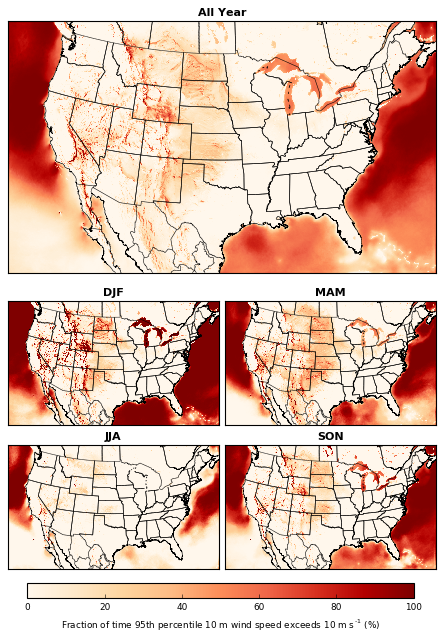

In [7]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(4, 2)
ax0 = plt.subplot(gs[0:2, 0:])
ax1 = plt.subplot(gs[2, 0:1])
ax2 = plt.subplot(gs[2, 1:])
ax3 = plt.subplot(gs[3, 0:1])
ax4 = plt.subplot(gs[3, 1:])

plt.sca(ax0)
plt.title('All Year', fontweight='semibold')
m.drawcoastlines(linewidth=.5)
m.drawstates(linewidth=.5)
m.drawcountries(linewidth=.5)
m.pcolormesh(lon, lat, ALL,
            latlon=True,
            cmap= 'OrRd',
            vmax=100, vmin=0)

plt.sca(ax1)
plt.title('DJF', fontweight='semibold')
m.drawcoastlines(linewidth=.5)
m.drawstates(linewidth=.5)
m.drawcountries(linewidth=.5)
m.pcolormesh(lon, lat, DJF,
             latlon=True,
             cmap= 'OrRd',
             vmax=100, vmin=0)

plt.sca(ax2)
plt.title('MAM', fontweight='semibold')
m.drawcoastlines(linewidth=.5)
m.drawstates(linewidth=.5)
m.drawcountries(linewidth=.5)
m.pcolormesh(lon, lat, MAM,
             latlon=True,
             cmap= 'OrRd',
             vmax=100, vmin=0)

plt.sca(ax3)
plt.title('JJA', fontweight='semibold')
m.drawcoastlines(linewidth=.5)
m.drawstates(linewidth=.5)
m.drawcountries(linewidth=.5)
m.pcolormesh(lon, lat, JJA,
             latlon=True,
             cmap= 'OrRd',
             vmax=100, vmin=0)

plt.sca(ax4)
plt.title('SON', fontweight='semibold')
m.drawcoastlines(linewidth=.5)
m.drawstates(linewidth=.5)
m.drawcountries(linewidth=.5)
mesh = m.pcolormesh(lon, lat, SON,
             latlon=True,
             cmap= 'OrRd',
             vmax=100, vmin=0)

#fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.16, 0.1, 0.7, 0.02]) # [left, bottom, width, height]
cb = fig.colorbar(mesh, cax=cbar_ax, ticks=range(0,101,20), orientation='horizontal')
cb.ax.set_xlabel(r'Fraction of time 95th percentile 10 m wind speed exceeds 10 m s$\mathregular{^{-1}}$ (%)')

plt.savefig('./figs/Fig_11_CONUS_95th_wind_occurance')